In [68]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import pandas as pd



In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [11]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [12]:
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=train_images,
                    y=train_labels_cat, epochs=5, batch_size=64,
                    validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9872 - val_loss: 0.0452
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9897 - val_loss: 0.0443
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.9971 - loss: 0.0094 - val_accuracy: 0.9895 - val_loss: 0.0474
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9902 - val_loss: 0.0416
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9897 - val_loss: 0.0531


In [63]:
y_true= test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [62]:
classes = [0,1,2,3,4,5,6,7,8,9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


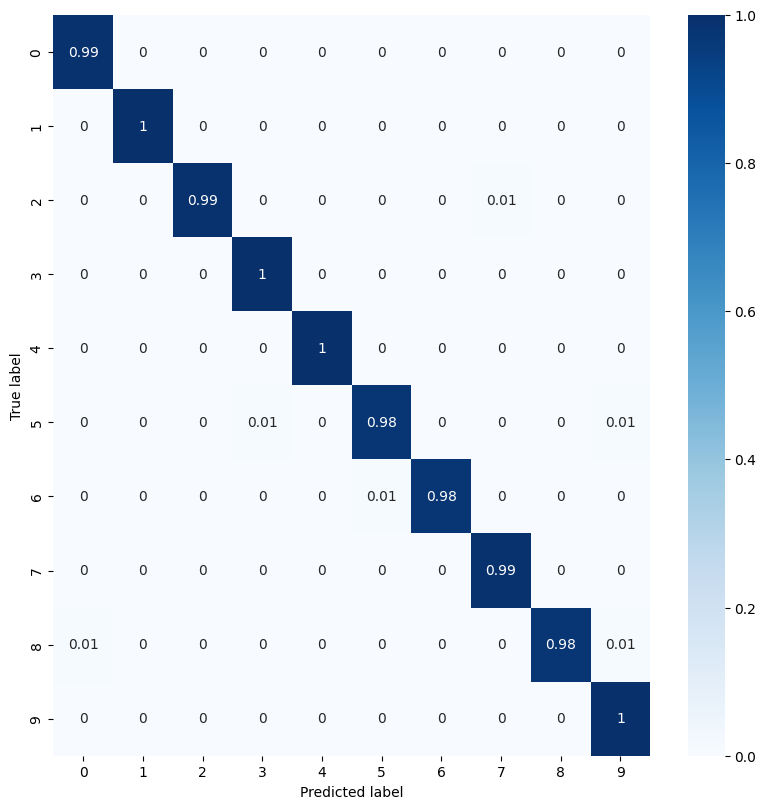

In [72]:
y_pred_probs = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_true_classes = test_labels

con_mat = tf.math.confusion_matrix(labels=y_true_classes, predictions=y_pred_classes).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [81]:
num_classes = con_mat.shape[0]

accuracy = []
precision = []
recall = []
f1_score = []
specificity = []

for i in range(num_classes):
    TP = con_mat[i, i]
    FP = np.sum(con_mat[:, i]) - TP
    FN = np.sum(con_mat[i, :]) - TP
    TN = np.sum(con_mat) - (TP + FP + FN)

    acc = (TP + TN) / np.sum(con_mat)
    prec = TP / (TP + FP) if (TP + FP) > 0 else 0
    rec = TP / (TP + FN) if (TP + FN) > 0 else 0
    spec = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0


    accuracy.append(round(acc, 2))
    precision.append(round(prec, 2))
    recall.append(round(rec, 2))
    specificity.append(round(spec, 2))
    f1_score.append(round(f1, 2))

for i in range(num_classes):
    print(f"Classe {i}:")
    print(f"  Acurácia: {accuracy[i]:.2f}")
    print(f"  Precisão: {precision[i]:.2f}")
    print(f"  Sensibilidade: {recall[i]:.2f}")
    print(f"  F1-Score: {f1_score[i]:.2f}")
    print(f"  Especificidade: {specificity[i]:.2f}")
    print()


Classe 0:
  Acurácia: 1.00
  Precisão: 0.99
  Sensibilidade: 0.99
  F1-Score: 0.99
  Especificidade: 1.00

Classe 1:
  Acurácia: 1.00
  Precisão: 1.00
  Sensibilidade: 1.00
  F1-Score: 1.00
  Especificidade: 1.00

Classe 2:
  Acurácia: 1.00
  Precisão: 0.99
  Sensibilidade: 0.99
  F1-Score: 0.99
  Especificidade: 1.00

Classe 3:
  Acurácia: 1.00
  Precisão: 0.99
  Sensibilidade: 1.00
  F1-Score: 0.99
  Especificidade: 1.00

Classe 4:
  Acurácia: 1.00
  Precisão: 0.99
  Sensibilidade: 1.00
  F1-Score: 0.99
  Especificidade: 1.00

Classe 5:
  Acurácia: 1.00
  Precisão: 0.99
  Sensibilidade: 0.98
  F1-Score: 0.99
  Especificidade: 1.00

Classe 6:
  Acurácia: 1.00
  Precisão: 1.00
  Sensibilidade: 0.98
  F1-Score: 0.99
  Especificidade: 1.00

Classe 7:
  Acurácia: 1.00
  Precisão: 0.98
  Sensibilidade: 0.99
  F1-Score: 0.99
  Especificidade: 1.00

Classe 8:
  Acurácia: 1.00
  Precisão: 0.99
  Sensibilidade: 0.98
  F1-Score: 0.99
  Especificidade: 1.00

Classe 9:
  Acurácia: 1.00
  Precisão

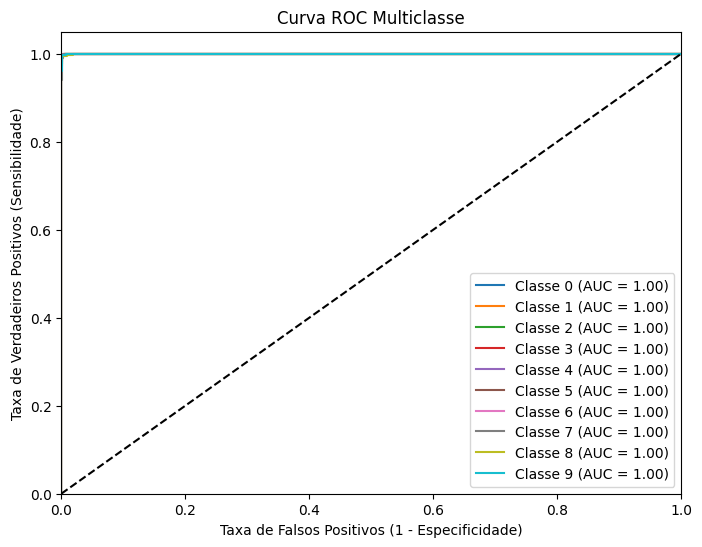

In [80]:
num_classes = con_mat.shape[0]

y_true_bin = label_binarize(y_true, classes=range(num_classes))

plt.figure(figsize=(8,6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()
